# Setup

In [1]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import pandas as pd
import seaborn as sns

import sys
sys.path.append('D://repos//custom_packages')
import dataviz as dv

# Read from GWV target files

## Path definition

In [8]:
model_cwd = 'D:/MAURICE/MAURICE Model/MAU_v2/MAU_v2_transient/MAU_v2_4_2'
model_name = 'M2v4_2'
date_start = datetime.datetime(2023,9,3)
if not os.path.exists(os.path.join(model_cwd, 'plot')):
    os.makedirs(os.path.join(model_cwd, 'plot'))

## Visualization

### Subplots

In [9]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in target_results.Time]
target_results['Date'] = dates

# Sort from North to South
df_plot = target_results.sort_values('Y', ascending=False).copy()

print('Number of head target points: ', len(target_results.Name.unique()))

Number of head target points:  48


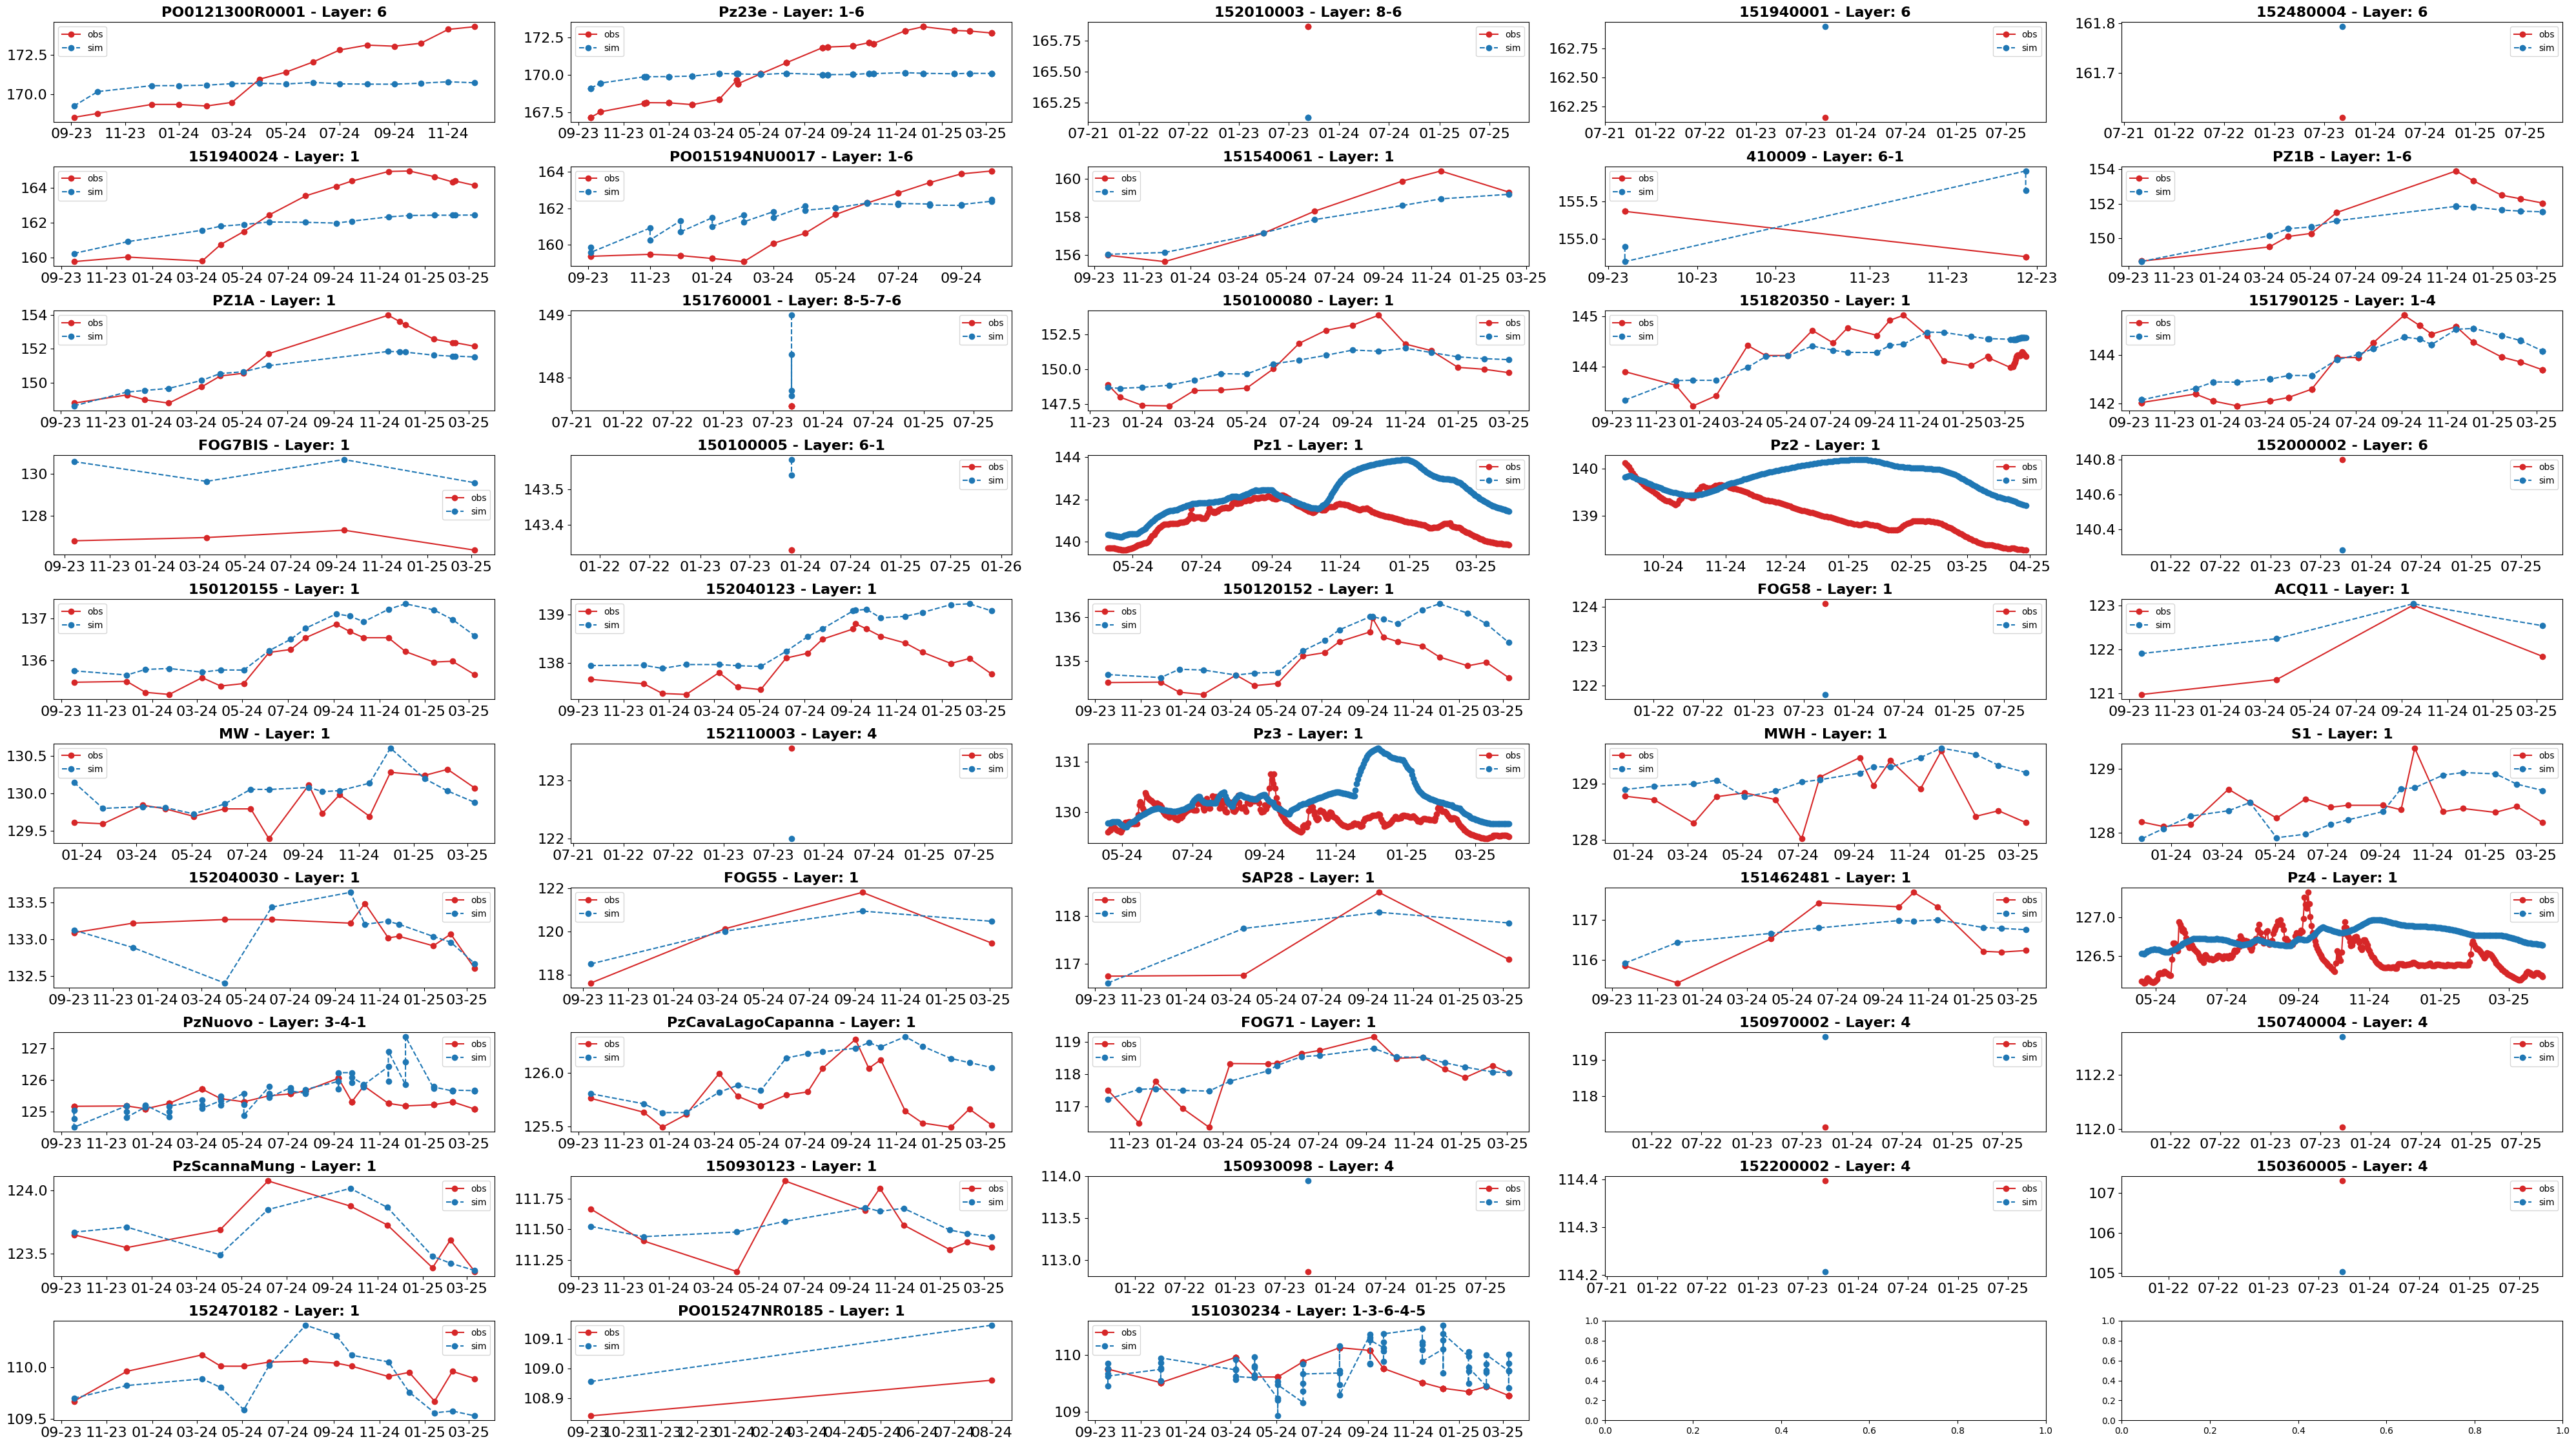

In [10]:
# Visualize subplots
fmt = mdates.DateFormatter('%m-%y')

fig, axes = plt.subplots(10, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

i = 0
for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)
        
    i += 1

fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots.png'), bbox_inches = 'tight', dpi = 300)

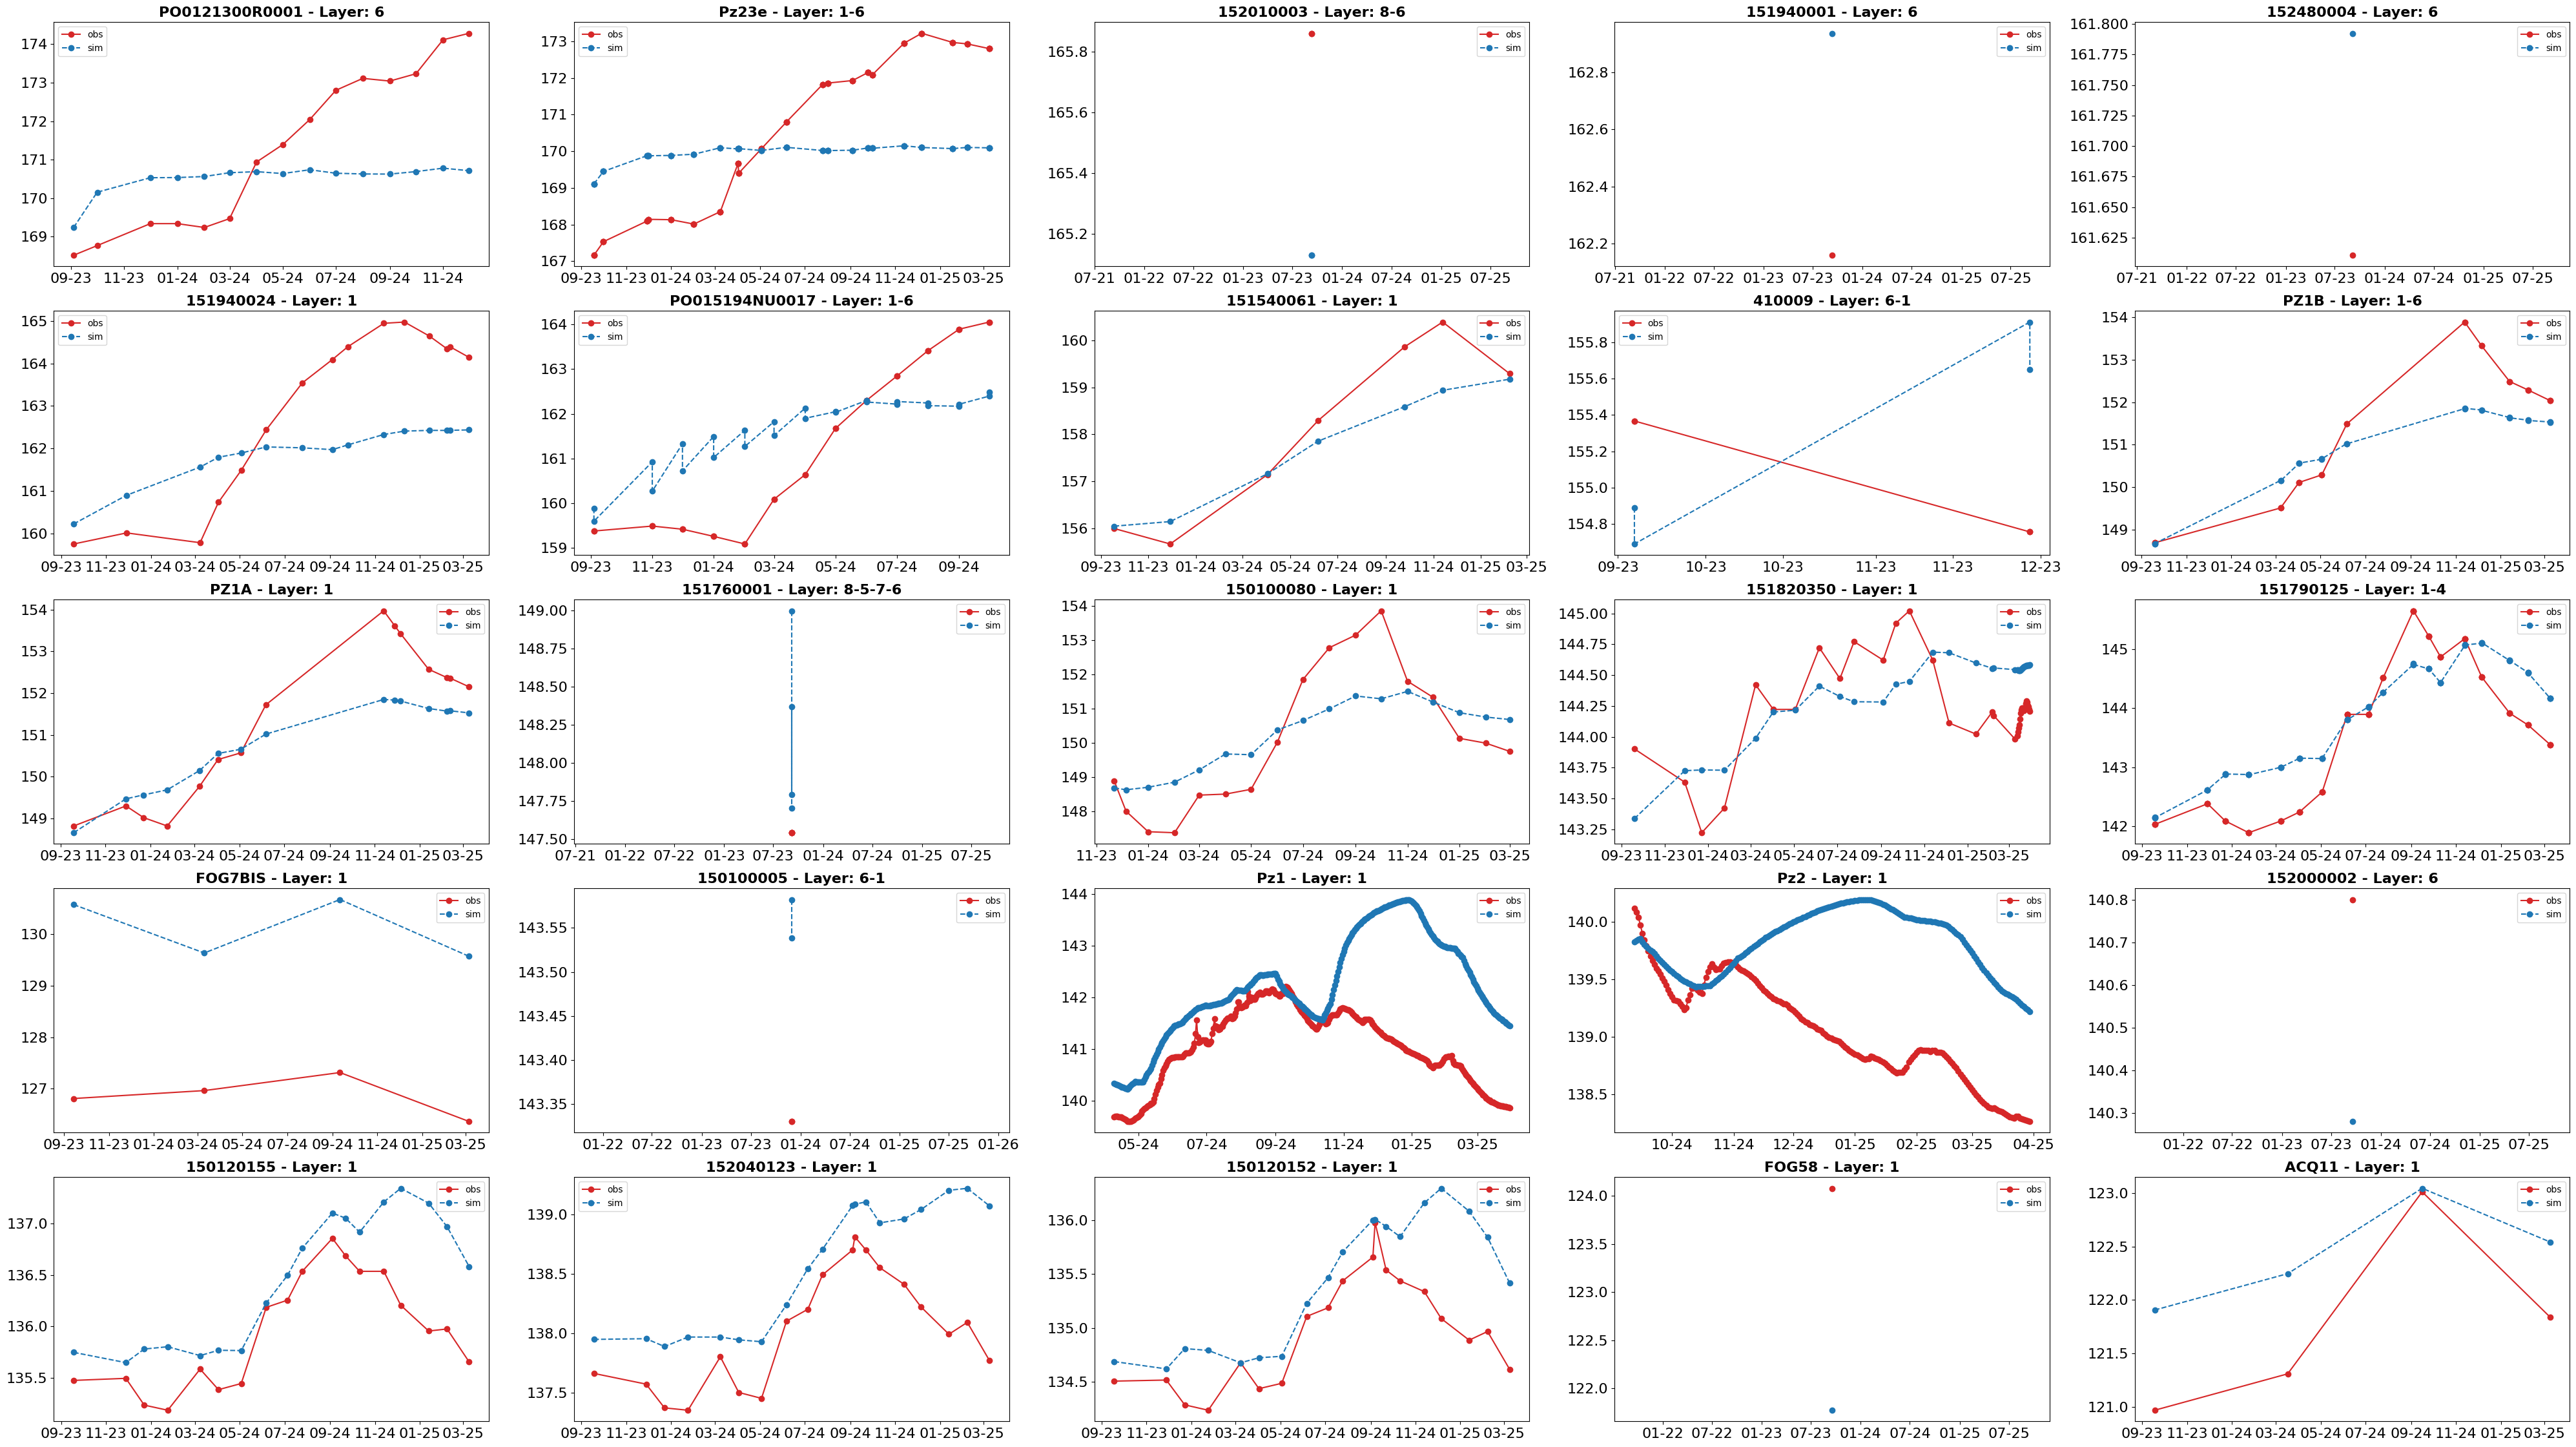

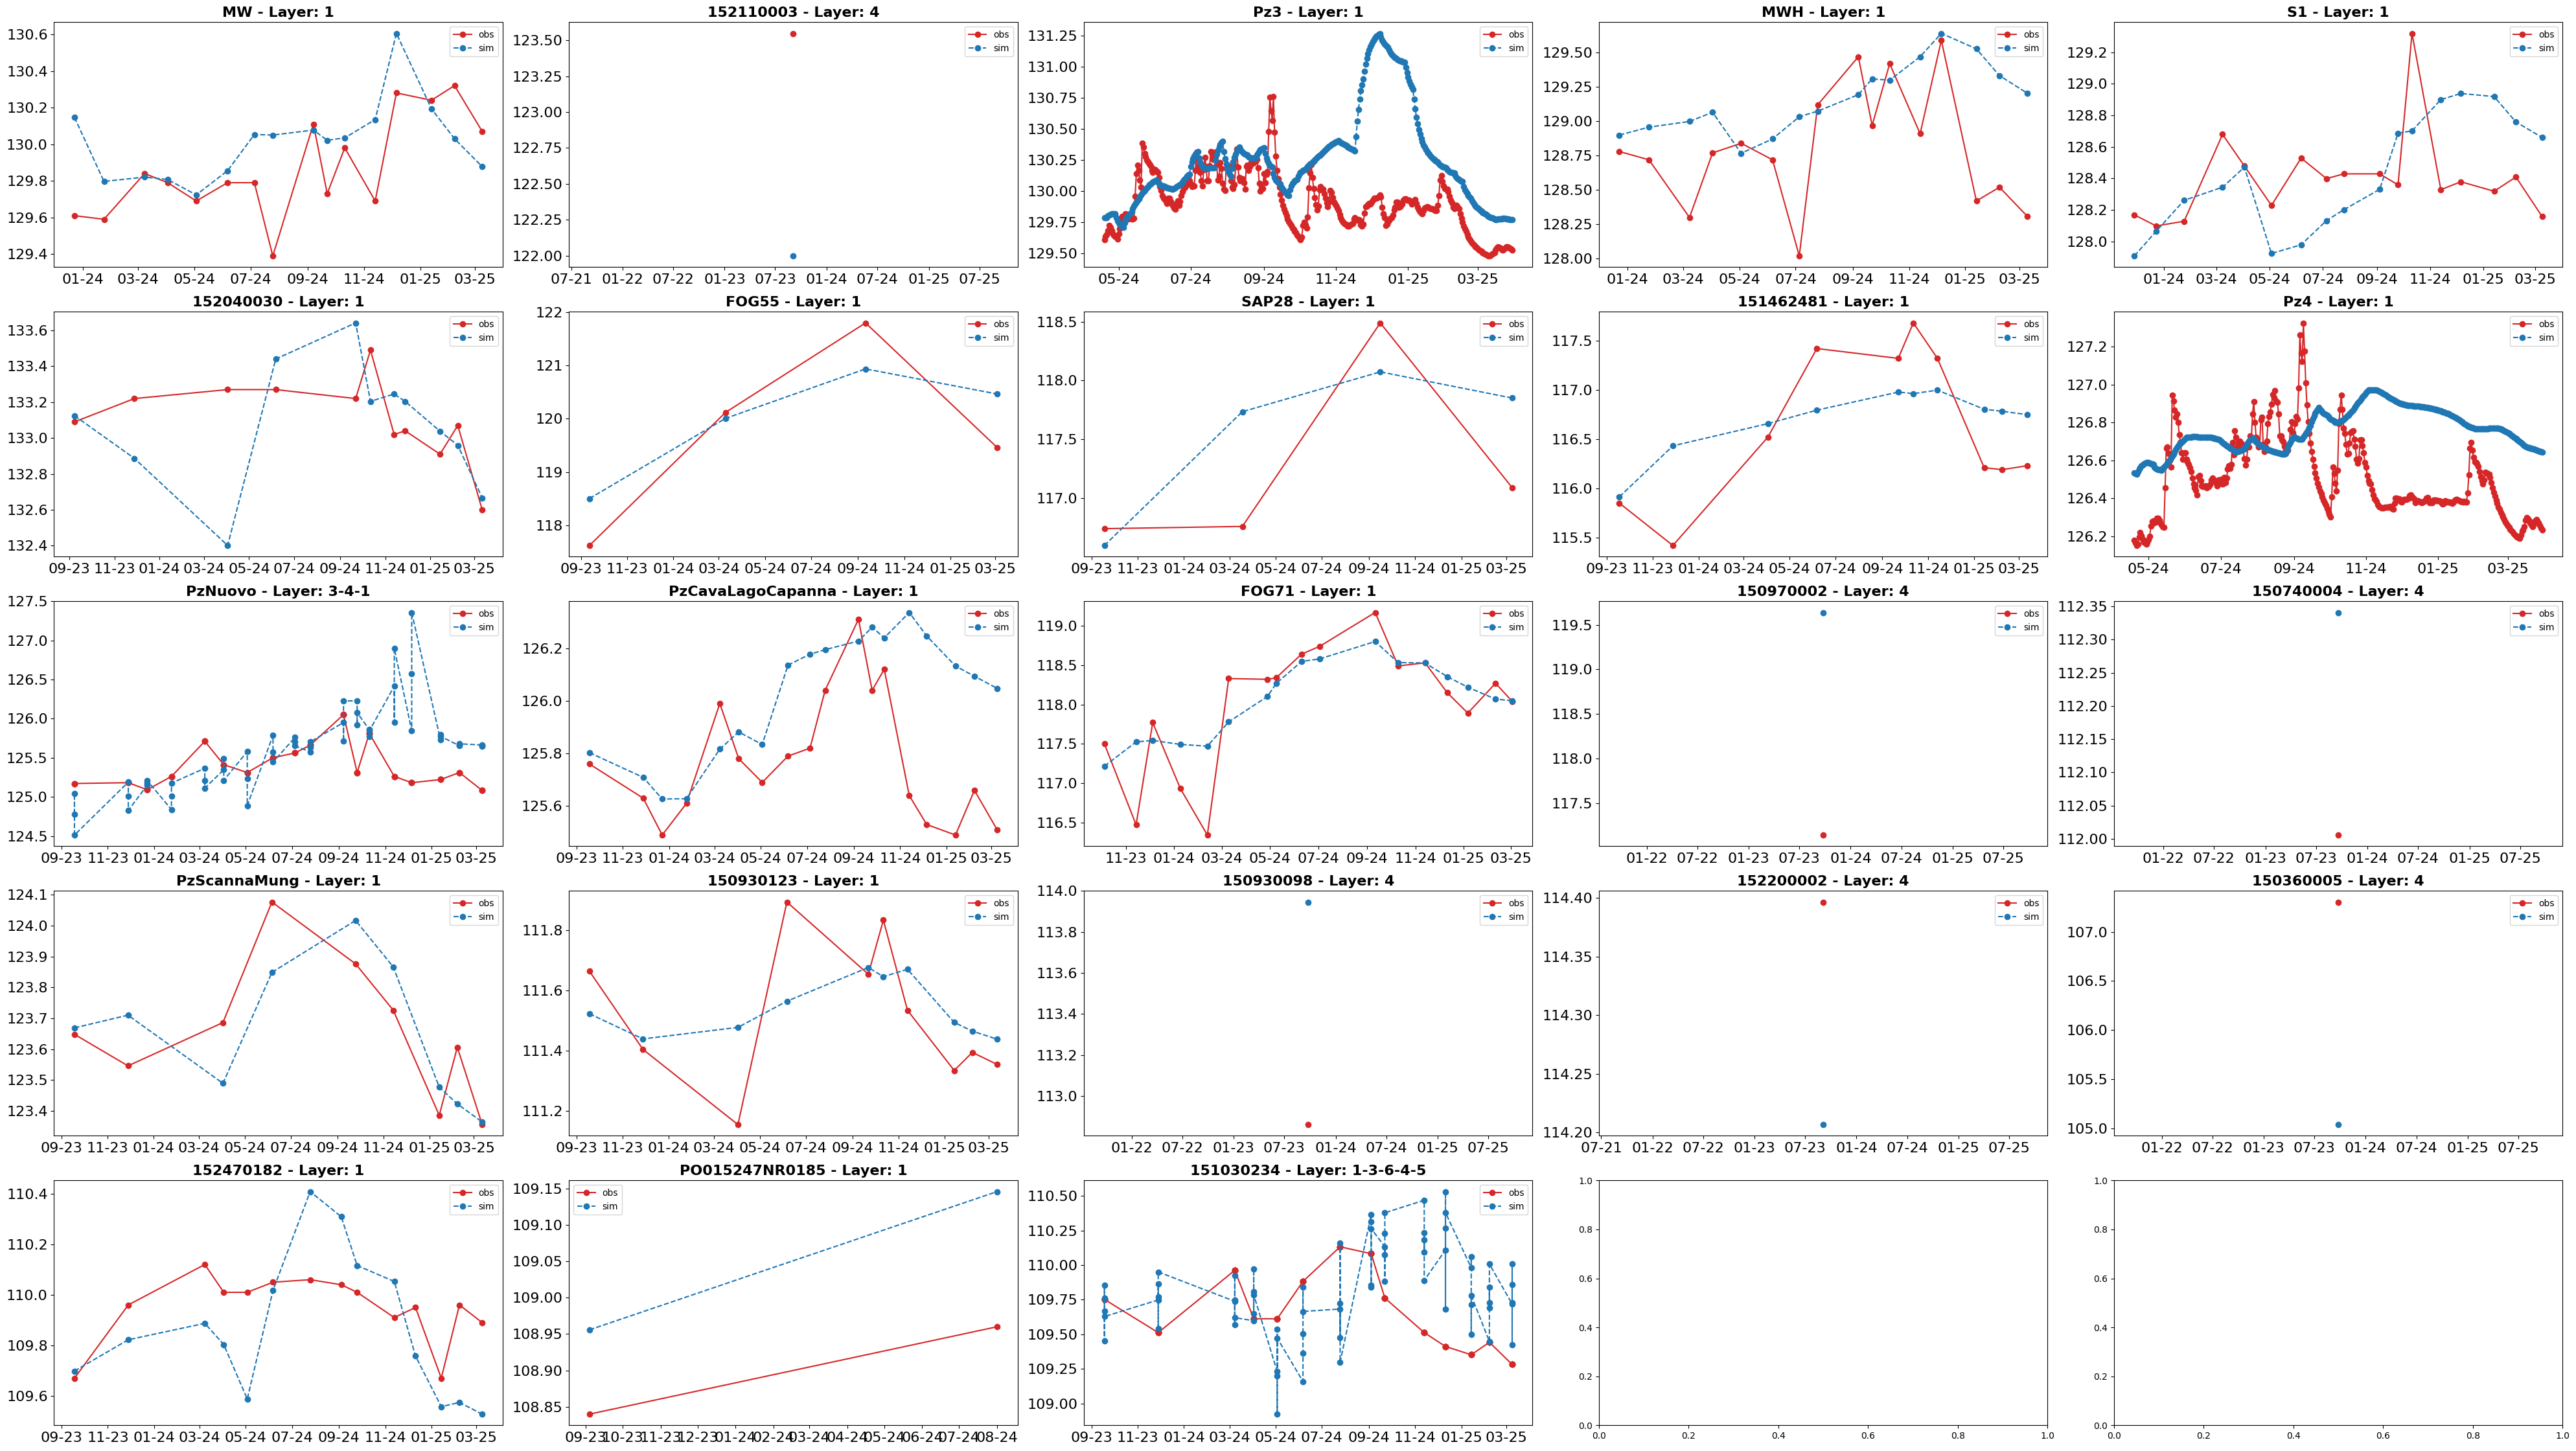

In [11]:
# Visualize subplots, split in 2
fmt = mdates.DateFormatter('%m-%y')

fig, axes = plt.subplots(5, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

i = 0
for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)
        i += 1

fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots-part1.png'), bbox_inches = 'tight', dpi = 300)

fig, axes = plt.subplots(5, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)  
        i += 1

fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots-part2.png'), bbox_inches = 'tight', dpi = 300)

### Scatterplot obs vs sim

In [12]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

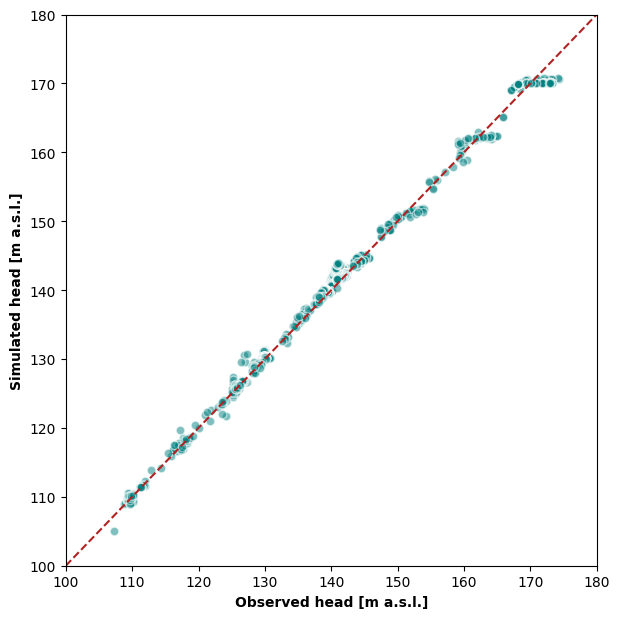

In [13]:
fig, ax = plt.subplots(1,1, figsize = dv.cm2inch(8*2, 8*2))

sns.scatterplot(df_plot, x = 'Observed', y = 'Simulated', marker = '.', ax = ax, alpha = 0.5,
                s = 150, color = 'teal')

ax.axline((0,0), (180,180), color='firebrick', linestyle='--')
ax.set_xlim(100,180)
ax.set_ylim(100,180)

ax.set_xlabel('Observed head [m a.s.l.]', fontweight = 'bold')
ax.set_ylabel('Simulated head [m a.s.l.]', fontweight = 'bold')
fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'obs-vs-sim.png'), bbox_inches = 'tight', dpi = 300)